In [1]:
## hyper params to keep in mind - Gamma, Regulatization, kernal
## Vector near to the plane, hyperplane, line dividing the categories are call support vectors
## Margin is the distance of the support vectors from the plane
## If we consider only nearest vectors it has high gamma, if we consider distance vectors as well it called low gamma - 
## Low gamma avoids overfitting and computationally less expensive

## Regulatization is trying to create the plane considering each point called High Regulatization(C) highly computational
## compared to low regulatization which let's few points to be mis classified to avoide overfitting and computationally less expensive

## Kernel is which kind of plane might be more useful based on the data distribution, it can be linear, rbf etc

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data['target_names'] = data['target'].map({k:v for k,v in enumerate(iris.target_names)})
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


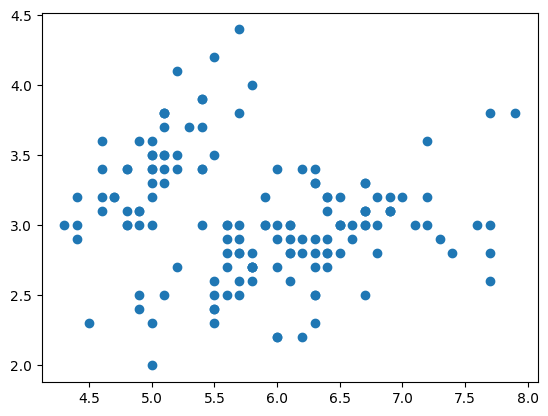

In [11]:
%matplotlib inline

plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'])

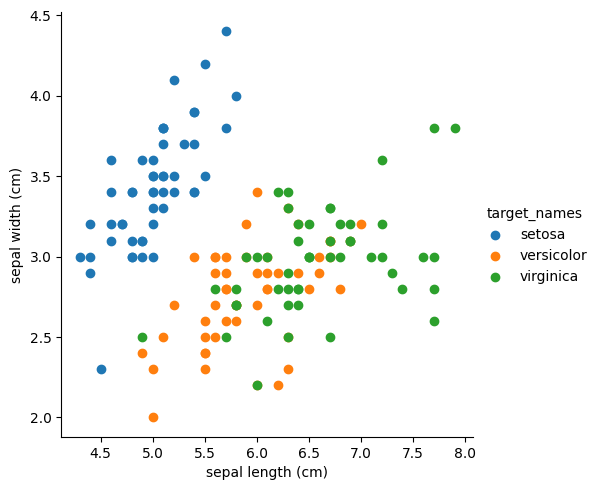

In [16]:
sns.FacetGrid(data, hue='target_names', height=5).map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)').add_legend()

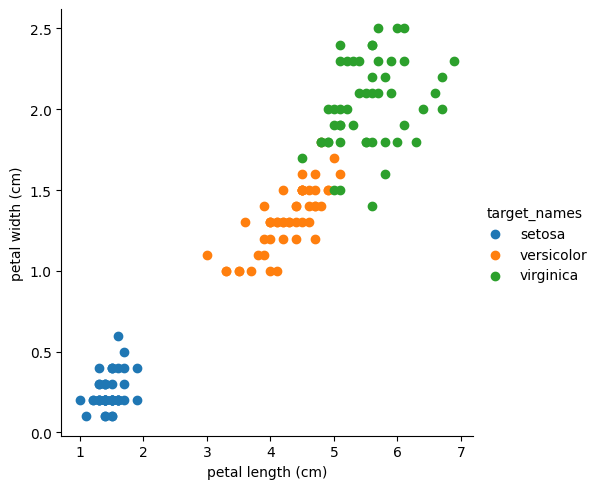

In [17]:
sns.FacetGrid(data, hue='target_names', height=5).map(plt.scatter, 'petal length (cm)', 'petal width (cm)').add_legend()

In [20]:
X = data.drop(columns=['target', 'target_names']).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [21]:
len(X_train)

120

In [28]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [29]:
model.score(X_test, y_test)

0.9333333333333333

In [30]:
model = SVC(C=1.5, kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [32]:
model.predict(X_test)

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 0, 1, 2, 2, 0, 2])

In [33]:
y_test

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 0, 1, 2, 2, 0, 2])